In [16]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img

## Частина 1

In [2]:
# Завантаження даних Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Побудова моделі
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [4]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Додавання додаткового розміру каналу для зображень
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [6]:
# Навчання моделі
history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 41s 42ms/step - loss: 0.6125 - accuracy: 0.8107 - val_loss: 0.4449 - val_accuracy: 0.8475
Epoch 2/10
938/938 [==============================] - 41s 44ms/step - loss: 0.3469 - accuracy: 0.8742 - val_loss: 0.3528 - val_accuracy: 0.8742
Epoch 3/10
938/938 [==============================] - 42s 45ms/step - loss: 0.3054 - accuracy: 0.8893 - val_loss: 0.3361 - val_accuracy: 0.8791
Epoch 4/10
938/938 [==============================] - 42s 45ms/step - loss: 0.2767 - accuracy: 0.8979 - val_loss: 0.3039 - val_accuracy: 0.8925
Epoch 5/10
938/938 [==============================] - 42s 45ms/step - loss: 0.2615 - accuracy: 0.9041 - val_loss: 0.3131 - val_accuracy: 0.8907
Epoch 6/10
938/938 [==============================] - 41s 44ms/step - loss: 0.2379 - accuracy: 0.9125 - val_loss: 0.3169 - val_accuracy: 0.8901
Epoch 7/10
938/938 [==============================] - 41s 44ms/step - loss: 0.2253 - accuracy: 0.9164 - val_loss: 0.3117 - val_accuracy:

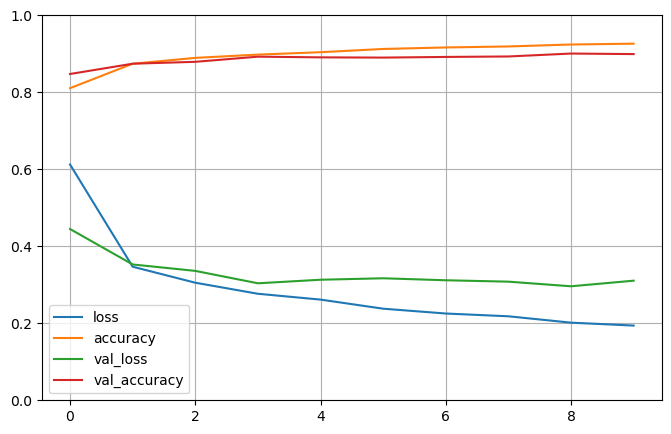

In [7]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [8]:
# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.3106 - accuracy: 0.8992
Test accuracy: 0.8992000222206116


313/313 [==============================] - 2s 7ms/step


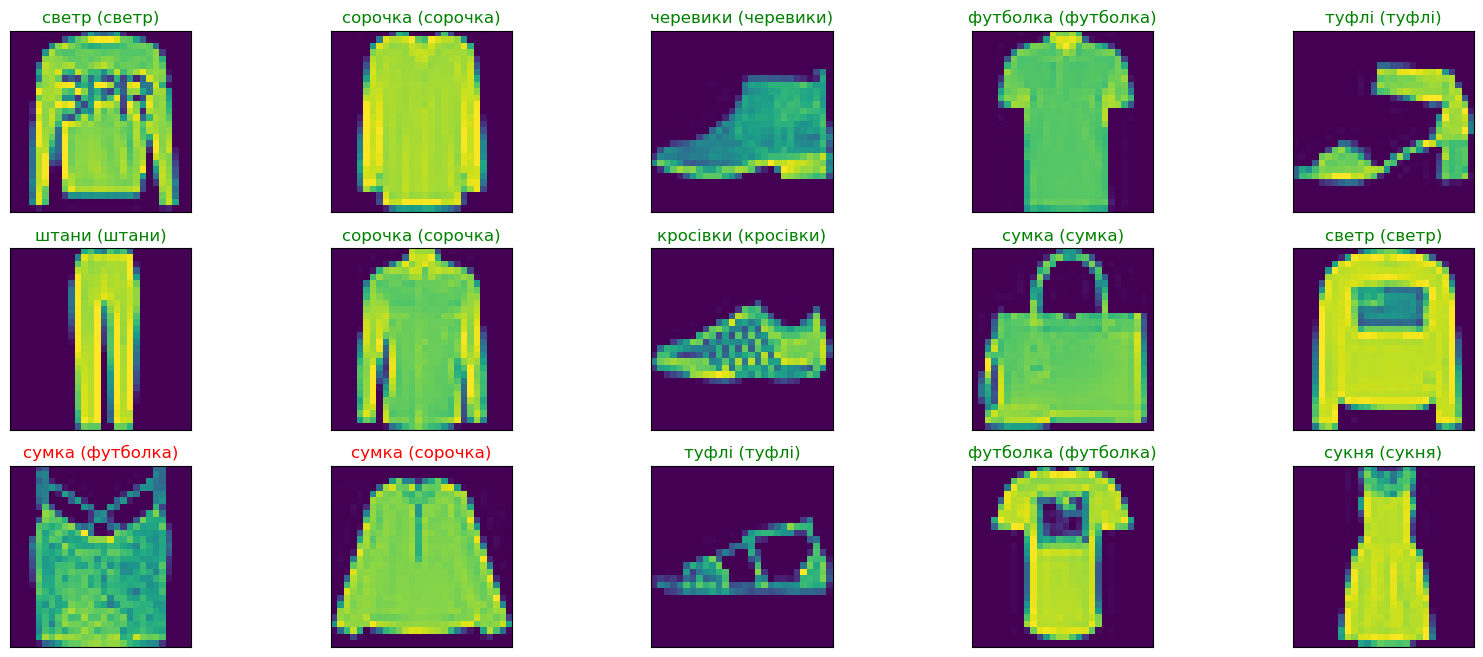

In [9]:
classes = ['футболка', 'штани', 'светр', 'сукня', 'пальто',
           'туфлі', 'сорочка', 'кросівки', 'сумка', 'черевики']

y_hat = model.predict(test_images)
X_test = test_images.reshape(10000, 28, 28)
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = test_labels[index]
    ax.set_title("{} ({})".format(classes[predict_index],
                                  classes[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

## Висновок: 

Порівнюючи згорткову нейронну мережу з мережою з минулого домашнього завдання можна сказати що результати згорткової мережі на тестових данних майже не змінилися.

## Частина 2

In [10]:
# Завантаження даних Fashion MNIST та нормалізація
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0

In [17]:
# Зміна розміру вхідних даних Fashion MNIST до розміру (32, 32)
train_images_resized = [img_to_array(array_to_img(image).resize((32, 32))) for image in train_images]
train_images_resized = tf.convert_to_tensor(train_images_resized)

test_images_resized = [img_to_array(array_to_img(image).resize((32, 32))) for image in test_images]
test_images_resized = tf.convert_to_tensor(test_images_resized)

In [28]:
# Розширення вхідних даних Fashion MNIST до трьох каналів
train_images_resized_rgb = np.repeat(train_images_resized, 3, axis=-1)
test_images_resized_rgb = np.repeat(test_images_resized, 3, axis=-1)

In [29]:
# Визначення моделі VGG16 без верхніх повністю зв'язаних шарів та завантаження ваг моделі ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [30]:
# Збудування моделі на основі VGG16
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [31]:
# Заморожуємо ваги базової моделі VGG16
base_model.trainable = False

In [32]:
# Компіляція моделі
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
# Навчання моделі
history = model.fit(train_images_resized_rgb, train_labels, epochs=10,
                    batch_size=64, validation_data=(test_images_resized_rgb, test_labels))

Epoch 1/10
938/938 [==============================] - 504s 537ms/step - loss: 4.5478 - accuracy: 0.5765 - val_loss: 0.8962 - val_accuracy: 0.7610
Epoch 2/10
938/938 [==============================] - 507s 541ms/step - loss: 1.0890 - accuracy: 0.7112 - val_loss: 0.6795 - val_accuracy: 0.7883
Epoch 3/10
938/938 [==============================] - 502s 535ms/step - loss: 0.8192 - accuracy: 0.7520 - val_loss: 0.6158 - val_accuracy: 0.8044
Epoch 4/10
938/938 [==============================] - 496s 529ms/step - loss: 0.7232 - accuracy: 0.7735 - val_loss: 0.5890 - val_accuracy: 0.8130
Epoch 5/10
938/938 [==============================] - 498s 531ms/step - loss: 0.6703 - accuracy: 0.7904 - val_loss: 0.5697 - val_accuracy: 0.8203
Epoch 6/10
938/938 [==============================] - 492s 525ms/step - loss: 0.6304 - accuracy: 0.8017 - val_loss: 0.5590 - val_accuracy: 0.8275
Epoch 7/10
938/938 [==============================] - 697s 743ms/step - loss: 0.6064 - accuracy: 0.8077 - val_loss: 0.5461 -

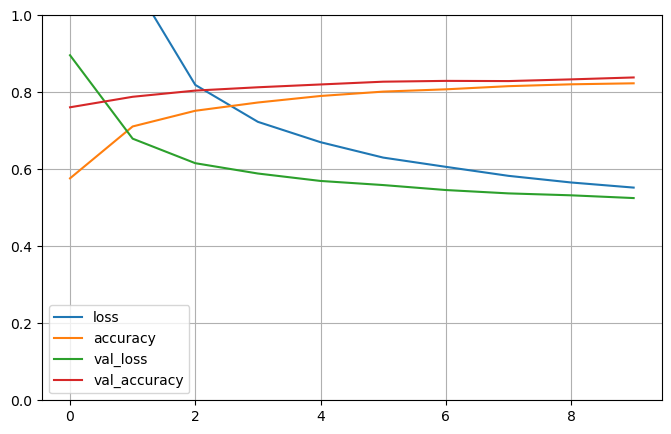

In [34]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [35]:
# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(test_images_resized_rgb, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 68s 217ms/step - loss: 0.5252 - accuracy: 0.8385
Test accuracy: 0.8385000228881836


## Висновок:

Як видно з результату на тестових данних в 83% і зважаючи на час навчання (близько 1г 40хв на двух ядерному процессорі IntelCore i5), використання нейронної мережі на базі VGG16 вважаю нераціональним.